## Wine 데이터셋 로드하기

In [1]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu'
                      '/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins','Color intensity',
    'Hue', 'OD280/Od315 of diluted wines', 'Proline'
]

print('클래스 레이블', np.unique(df_wine['Class label']))
df_wine.head()

클래스 레이블 [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/Od315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## 데이터셋을 훈련셋과 테스트셋으로 나누기

In [2]:
from sklearn.model_selection import train_test_split

# 인덱스 1에서 인덱스 13까지 특성을 넘파일 배열로 변환하여 x에 할당
x = df_wine.iloc[:, 1:].values
# 첫번째 열의 클래스 레이블을 y에 할당
y = df_wine.iloc[:, 0].values
# train_test_split 함수를 사용하여 x와 y를 랜덤하게 훈련셋과 테스트셋으로 분할
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.3,      # 와인 샘플의 30%가 x_test와 y_test에 할당 
    random_state=0, 
    stratify=y          # y로 하면 훈련셋과 테스트셋에 있는 클래스 비율이 원본 데이터셋과 동일하게 유지됨
)

데이터 양에 따라서 적절한 비율의 테스트셋을 준비해야 한다.<br/>
데이터가 클수로 테스트셋의 비율을 적게해도된다.<br/>

## 특성 스케일 맞추기

결정 트리와 랜덤 포레스트 알고리즘은 특성 스케일의 영향을 받지 않는다.<br/>
경사 하강법 알고리즘은 특성 스케일이 같은 때 훨씬 성능이 좋다.<br/>
특성 스케일이 한쪽이 크면 해당 특성에만 맞추어 최적화된다.<br/>
특성 스케일을 맞추는 두가지 방법은 정규화(normalization)와 표준화(standardization)가 있다.<br/>

**정규화**는 특성의 스케일을 [0, 1] 범위에 맞추는 것이다.<br/>
정규화의 예로 최소-최대 스케일 변환(min-max scaling)이 있다.<br/>
최소-최대 스케일 변환은 범위가 정해진 값이 필요할 때 유용하다.<br/>
최소-최대 스케일 변환은 비정상적으로 큰 값이나 아주 작은 값이 있을때, 다른 샘플들이 좁은 구간에 촘촘하게 모아지는 단점이 있다.<br/>
최소-최대 스케일 변환은 다음과 같이 정의한다.<br/>
$$x^{(i)}_{norm}={{x^{(i)}-x_{min}} \over {x_{max}-x_{min}}}$$

이를 사이킷런으로 구현하면 다음과 같다.

In [3]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
# fit 함수는 훈련셋에만 딱 한번 적용해야 한다. 
# 이때 학습만 파라미터로 테스트셋과 데이토 포인트를 모두 변환한다.
x_train_norm = mms.fit_transform(x_train)
x_test_norm = mms.transform(x_test)

**표준화**는 평균을 0, 표준편차를 1로 만들어 정규 분포와 같은 특징을 가지도록 만드는 것이다.<br/>
표준화 공식은 다음과 같다.<br/>
$$x^{(i)}_{std}={{x^{(i)}-\mu_x} \over {\sigma_x}}$$

$\mu_x$는 특성의 샘플 평균이다.
$\sigma_x$는 특성의 표준편차이다.

표준화는 가중치를 좀 더 쉽게 학습할 수 있게 한다.
표준화는 비정상적으로 큰값이나 작은값에 덜 민감하다.

이를 사이킷런으로 구현하면 다음과 같다.

In [4]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
# fit 함수는 훈련셋에만 딱 한번 적용해야 한다. 
# 이때 학습만 파라미터로 테스트셋과 데이토 포인트를 모두 변환한다.
x_train_std = stdsc.fit_transform(x_train)
x_test_std = stdsc.transform(x_test)

표준화와 정규화는 다음과 같은 코드로도 만들 수 있다.

In [5]:
ex = np.array([0,1,2,3,4,5])

print('표준화:', (ex - ex.mean()) / ex.std())
print('정규화:', (ex - ex.min()) / ( ex.max() - ex.min()))

표준화: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
정규화: [0.  0.2 0.4 0.6 0.8 1. ]


## 유용한 특성 선택

모델의 테스트셋보다 훈련셋의 성능이 높다면 overfitting을 의심할 수 있다.<br/>
overfitting은 훈련셋의 특정 샘플들에 대해서 과대적합되어 새로운 데이터에는 잘 일반화하지 못하는 현상이다.<br/>
overfitting의 원인은 주어진 훈련 데이터에 비해 모델이 너무 복잡하기 때문이다.<br/>
overfitting을 막기위한 방법은 다음과 같다.<br/>

- 더 많은 훈련 데이터를 모은다.
- Regularization를 통해 복잡도를 제한한다.(줄인다)
- 파라미터 개수가 적은 간단한 모델을 선택한다.
- 데이터 차원을 줄인다.

### 모델 복잡도 제한을 위한 L1 Regularization와 L2 Regularization

L2 Regularization는 다음과 같이 정의한다.

$$L2:\Vert w \|^2_2=\sum_{j-1}^mw^2_j$$

L1 Regularization는 다음과 같이 정의한다.

$$L1:\| w \|_1=\sum_{j-1}^m|w_j|$$

L2는 가중치를 제곱하고, L1은 가중치의 절댓값을 구한다.<br/>
L2는 비용함수에 패널티 항을 추가해서 가중치의 값을 아주 작게 만든다.<br/>
L1은 보통 희소한 벡터를 만든다. 즉, 대부분의 가중치가 0이된다.<br/>

Wine 데이터에 L1 Regularization을 로지스틱 회귀로 적용하면 다음과 같다.

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    solver='liblinear', multi_class='auto', # 두가지 설정을 다중 클래스 데이터셋에 적용하면 OvR 방식을 사용 
    penalty='l1',       # L1 Regularization을 사용 
    C=1.0,              # C값을 낮추면 Regularization의 강도가 강해진다.
    random_state=42
) 

lr.fit(x_train_std, y_train)
print('훈련 정확도:', lr.score(x_train_std, y_train))
print('테스트 정확도:', lr.score(x_test_std, y_test))

# intercept_ 속성은 절편을 의미한다.
# [클래스1을 2,3과 구분하는 모델에 속한 절편,클래스2을 1,3과 구분하는 모델에 속한 절편,클래스3을 1,2과 구분하는 모델에 속한 절편]
lr.intercept_

# coef_ 속성에 있는 가중치는 클래스마다 벡터 하나씩 세 개의 행이 있는 가중치 배열이다.
lr.coef_

훈련 정확도: 1.0
테스트 정확도: 1.0


array([[ 1.2460319 ,  0.1807062 ,  0.74653137, -1.16381009,  0.        ,
         0.        ,  1.15973686,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55705673,  2.50870623],
       [-1.53734059, -0.38713982, -0.99508471,  0.36483879, -0.05969195,
         0.        ,  0.66803946,  0.        ,  0.        , -1.93424688,
         1.23402627,  0.        , -2.23196901],
       [ 0.13553583,  0.1672072 ,  0.35653325,  0.        ,  0.        ,
         0.        , -2.44311777,  0.        ,  0.        ,  1.56723369,
        -0.82103411, -0.48576419,  0.        ]])

Regularization의 강도에 따른 가중치 변화 그래프를 그려보면 다음과 같다.

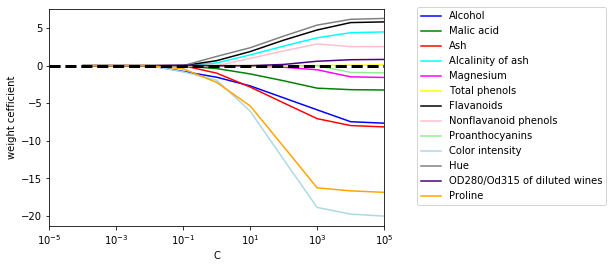

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = [
    'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black',
    'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange'
]
weights, params = [], []

for c in np.arange(-4., 6.):
    lr = LogisticRegression(solver='liblinear', multi_class='auto', penalty='l1', C=10.**c, random_state=0)
    lr.fit(x_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column + 1], color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight cefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

## 순차 특성 선택 알고리즘

모델의 복잡도를 줄이고 overfitting을 피하는 다른 방법은 특성 선택을 통한 차원 축소(dimensionality reduction)이다.<br/>
차원 축소 기법은 특성 선택(feature selection)과 특성 추출(feature extraction)이 있다.<br/>
특성 선택은 원본 특성에서 일부를 선택한다.<br/>
특성 추출은 일련의 특성에서 얻은 정보로 새로운 특성을 만든다.(5장에서 확인)<br/>

**순차 특성 선택(sequential feature selection)**<br/>
알고리즘은 탐욕적 탐색적 알고리즘(greedy search algorithm)이다.<br/>
특성 선택 알고리즘의 목적은 주어진 문제에 가장 관련이 높은 특성 부분 집합을 자동으로 선택하는 것이다.<br/>
관계없는 특성이나 잡음을 제거하여 계산 효율성을 높이고, 모델의 일반화 오차를 줄인다.<br/>
Regularization이 없는 모델에서 특히 유용하다.<br/>

**순차 후진 선택(Sequential Backward Selection, SBS)**<br/>
SBS는 새로운 특성의 부분 공간이 목표하는 특성 개수가 될 때까지 전체 특성에서 순차적으로 특성을 제거하는 알고리즘이다.<br/>
각 단계에서 특성 제거 여부를 결정하기 위한 기준 함수를 정의한다.<br/>
기준 함수에서 계산한 값은 어떤 특성을 제거하기 전후의 모델 성능 차이이다.<br/>
각 단계에서 제거했을때 성능 손실이 가장 적은 특성을 제거한다.<br/>
SBS 알고리즘의 각 단계는 다음과 같다.<br/>

SBS 알고리즘을 직접 구현하면 다음과 같다.(사이킷런은 미지원)<br/>

In [8]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS:
    def __init__(
            self, estimator,
            k_features,    # 목표 특성 개수를 설정
            scoring=accuracy_score, # 기본적으로 사이킷런의 accuracy_score 함수로 남은 특성들의 모델 성능을 평가
            test_size=0.25, random_state=1
    ):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features        
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, x, y):
        # 훈련셋과 테스트셋으로 나눈다.
        x_train, x_test, y_train, y_test = train_test_split(
            x, y, test_size=self.test_size, random_state=self.random_state
        )
        
        dim = x_train.shape[1]
        self.indices_ = tuple(range(dim))   # 최종 선택된 특성의 열 인덱스를 할당
        self.subsets_ = [self.indices_]
        score = self._calc_score(x_train, y_train, x_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []     # x_test로 최적 조합의 정확도 점수를 저장
            subsets = []
            
             # itertools.combination 함수에 의해 생성된 특성 조합을 평가
            for p in combinations(self.indices_, r=dim - 1):
                # 특성 조합의 모델을 평가
                score = self._calc_score(x_train, y_train, x_test, y_test, p)   
                scores.append(score)    # 평가 결과를 keep한다.
                subsets.append(p)       # 특성 조합을 keep한다.
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1    # 특성을 줄인다.
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def tranform(self, x):
        return x[:, self.indices_]  # 선택된 특성으로 구성된 데이터 배열 반환
    
    # 모델을 평가해서 평가 점수를 점수를 반환한다.
    def _calc_score(self, x_train, y_train, x_test, y_test, indices):
        self.estimator.fit(x_train[:, indices], y_train)
        y_pred = self.estimator.predict(x_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score
        

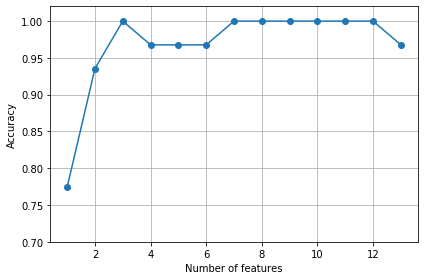

In [9]:
# KNN 분류기를 사용해서 SBS가 잘 동작하는지 테스트

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

sbs = SBS(knn, k_features=1)
# 내부적으로는 훈련셋과 테스트셋을 나누지만 KNN에서는 x_train 데이터만 넣는다.
sbs.fit(x_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

특성 개수가 줄었을 때 테스트셋에서 KNN 분류기의 정확도가 향상되었다.<br/>

k = [3, 7, 8, 9, 10, 11, 12]에서 분류기가 100% 정확도를 달성했다. 

In [10]:
# k=3일때 높은 테스트셋 성능을 내는 특성이 어떤 것이 있는지 확인한다.

k3 = list(sbs.subsets_[10])     # 세개의 특성에 대한 열 인덱스를 얻는다.
print(df_wine.columns[1:][k3])  # 열 인덱스로 판단스 Wine DataFrame의 특성 이름을 출력한다.


# 본래의 테스트셋으로 KNN 성능 확인
knn.fit(x_train_std, y_train)
print('훈련 정확도:', knn.score(x_train_std, y_train))
print('테스트 정확도:', knn.score(x_test_std, y_test))

# 선택된 세개의 특성으로 구성된 테스트셋으로 KNN의 성능 확인
knn.fit(x_train_std[:, k3], y_train)
print('훈련 정확도:', knn.score(x_train_std[:, k3], y_train))
print('테스트 정확도:', knn.score(x_test_std[:, k3], y_test))

Index(['Alcohol', 'Malic acid', 'OD280/Od315 of diluted wines'], dtype='object')
훈련 정확도: 0.967741935483871
테스트 정확도: 0.9629629629629629
훈련 정확도: 0.9516129032258065
테스트 정확도: 0.9259259259259259


원본 특성의 4분의 1보다도 적은 특성을 사용했지만, 테스트셋 예측 정확도는 약간 감소했다.<br/>
정확도 감소는 훈련셋을 다시 훈련셋과 테스트셋을 나눈 것의 영향을 받을 수 있다.<br/>
데이터셋의 크기가 줄었기 때문에 수집 비용이 높은 실전 애플리케이션에서 유용할 수 있다.<br/>
특성 개수가 크게 줄었기 때문에 모델이 간단하고 해석이 쉽다.<br/>

사이킷런에 준비된 특성 선택 알고리즘은 다음과 같다.
- 재귀적 특성 제거(recursive feature elimination): 특성 가중치에 기반을 둠
- 트리 기반 방법: 특성 중요도를 사용
- 일변량 통계 테스트(univariate statistical test)

## 랜덤 포레스트의 특성 중요도 사용

랜덤 포레스트는 데이터셋에서 유용한 특성을 선택하는 방법 중 하나이다.<br/>
랜덤 포레스트 앙상블에 참여한 모든 결정트리에서 계산한 평균적인 불순도 감소로 특성 중요도를 측정한다.<br/>
사이킷런의 RandomForestClassifier.feature_importances_는 특성 중요도 값이다.<br/>

다음은 랜덤 포레스트를 사용해서 특성의 중요도 순위를 매긴 것이다.<br/>

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/Od315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


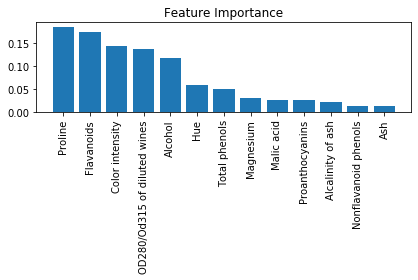

In [11]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

# 500개 의사결정트리를 사용
forest = RandomForestClassifier(n_estimators=500, random_state=1)
# 트리기반 모델은 표준화나 정규화를 할 필요가 없다.
forest.fit(x_train, y_train)
importances = forest.feature_importances_   #  특성 중요도 값

indices = np.argsort(importances)[::-1] # 중요도가 높은 순서대로 정렬

for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.tight_layout()
plt.show()

랜덤 포레스트에서 두 개 이상의 특성이 매우 상관관계가 높다면 하나의 특성은 매우 높은 순위를 갖지만 다른 특성 정보는 잡아내지 못할 수 있다.<br/>
특성 중요도 값에 대한 해석보다, 모델의 예측 성능에만 관심이 있다면 이 문제는 신경쓰지 않아도 된다.<br/>

사이킷런의 SelectFromModel은 모델 훈련이 끝난 후, 사용자가 지정한 임계 값을 기반으로 특성을 선택한다.<br/>
이제 위에서 만든 랜덤 포레스트에서 임계값을 0.1로 설정하고 5개의 특성을 선택하면 다음과 같다.<br/>

In [12]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
x_selected = sfm.transform(x_train)
print('이 임계 조건을 만족하는 샘플의 수:', x_selected.shape[1])

for f in range(x_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

이 임계 조건을 만족하는 샘플의 수: 5
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/Od315 of diluted wines   0.136162
 5) Alcohol                        0.118529
